In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
from datetime import datetime as dtdt
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import matplotlib.dates as mdates
from matplotlib.dates import date2num
from matplotlib.dates import DateFormatter
import seaborn as sns
sns.set()

In [2]:
path = "/Users/iomacbookair2/Documents/lab/DEIM2023/tweet_csv/221212_ann_mon.csv"
df = pd.read_csv((path))
df.sort_values(by = 'created_at', ascending = True, inplace = True)
df = df.reset_index(drop=True)
df['created_at'] = pd.to_datetime(df['created_at'])
df


,created_at,text,author_id,username
0,2022-12-13 01:00:00,#cnann,1042794426966274048,Lukewarm_Cola
1,2022-12-13 01:00:00,#cnann,1481240287586717699,naninune_noko
2,2022-12-13 01:00:00,#cnann,1273098105483919363,soy_sauce_bean
3,2022-12-13 01:00:00,#cnann,1509547571873980419,ArthurNN551242
4,2022-12-13 01:00:00,#cnann,1334708791527395328,zutoharu
...,...,...,...,...
3193,2022-12-13 03:03:53,アルニキ、松ニキお疲れ様。 #cnann,1547064634129416197,chandai_cn
3194,2022-12-13 03:03:53,来週、そこには劣等感が火を吹いて燃え尽きたDJニキが… #cnann,1433113323382312962,kth_itsu_ki
3195,2022-12-13 03:03:54,IOさんとKEIJUさんの呼び方はどうなるのか…。 そしてそのまま呼べるのか…。 お疲れ様で...,134407408,ayanishist824
3196,2022-12-13 03:04:03,今日も楽しかったです😊 お疲れ様でした！ また来週〜👋 #cnann,1496478767472324612,mg___cn


In [3]:
c_df = df.set_index('created_at').resample('T').count()
cnt = pd.DataFrame(
    {'created_at' : c_df.index.strftime('%Y-%m-%d %H:%M:%S'), 'counts' : c_df['text'].values})
cnt

,created_at,counts
0,2022-12-13 01:00:00,253
1,2022-12-13 01:01:00,105
2,2022-12-13 01:02:00,61
3,2022-12-13 01:03:00,45
4,2022-12-13 01:04:00,28
...,...,...
120,2022-12-13 03:00:00,33
121,2022-12-13 03:01:00,25
122,2022-12-13 03:02:00,12
123,2022-12-13 03:03:00,5


In [4]:
filename =  "count_221212_ann_mon.csv"
cnt.to_csv(filename, encoding = 'utf-8-sig')

In [5]:
max(cnt['counts']), min(cnt['counts'])

(253, 2)

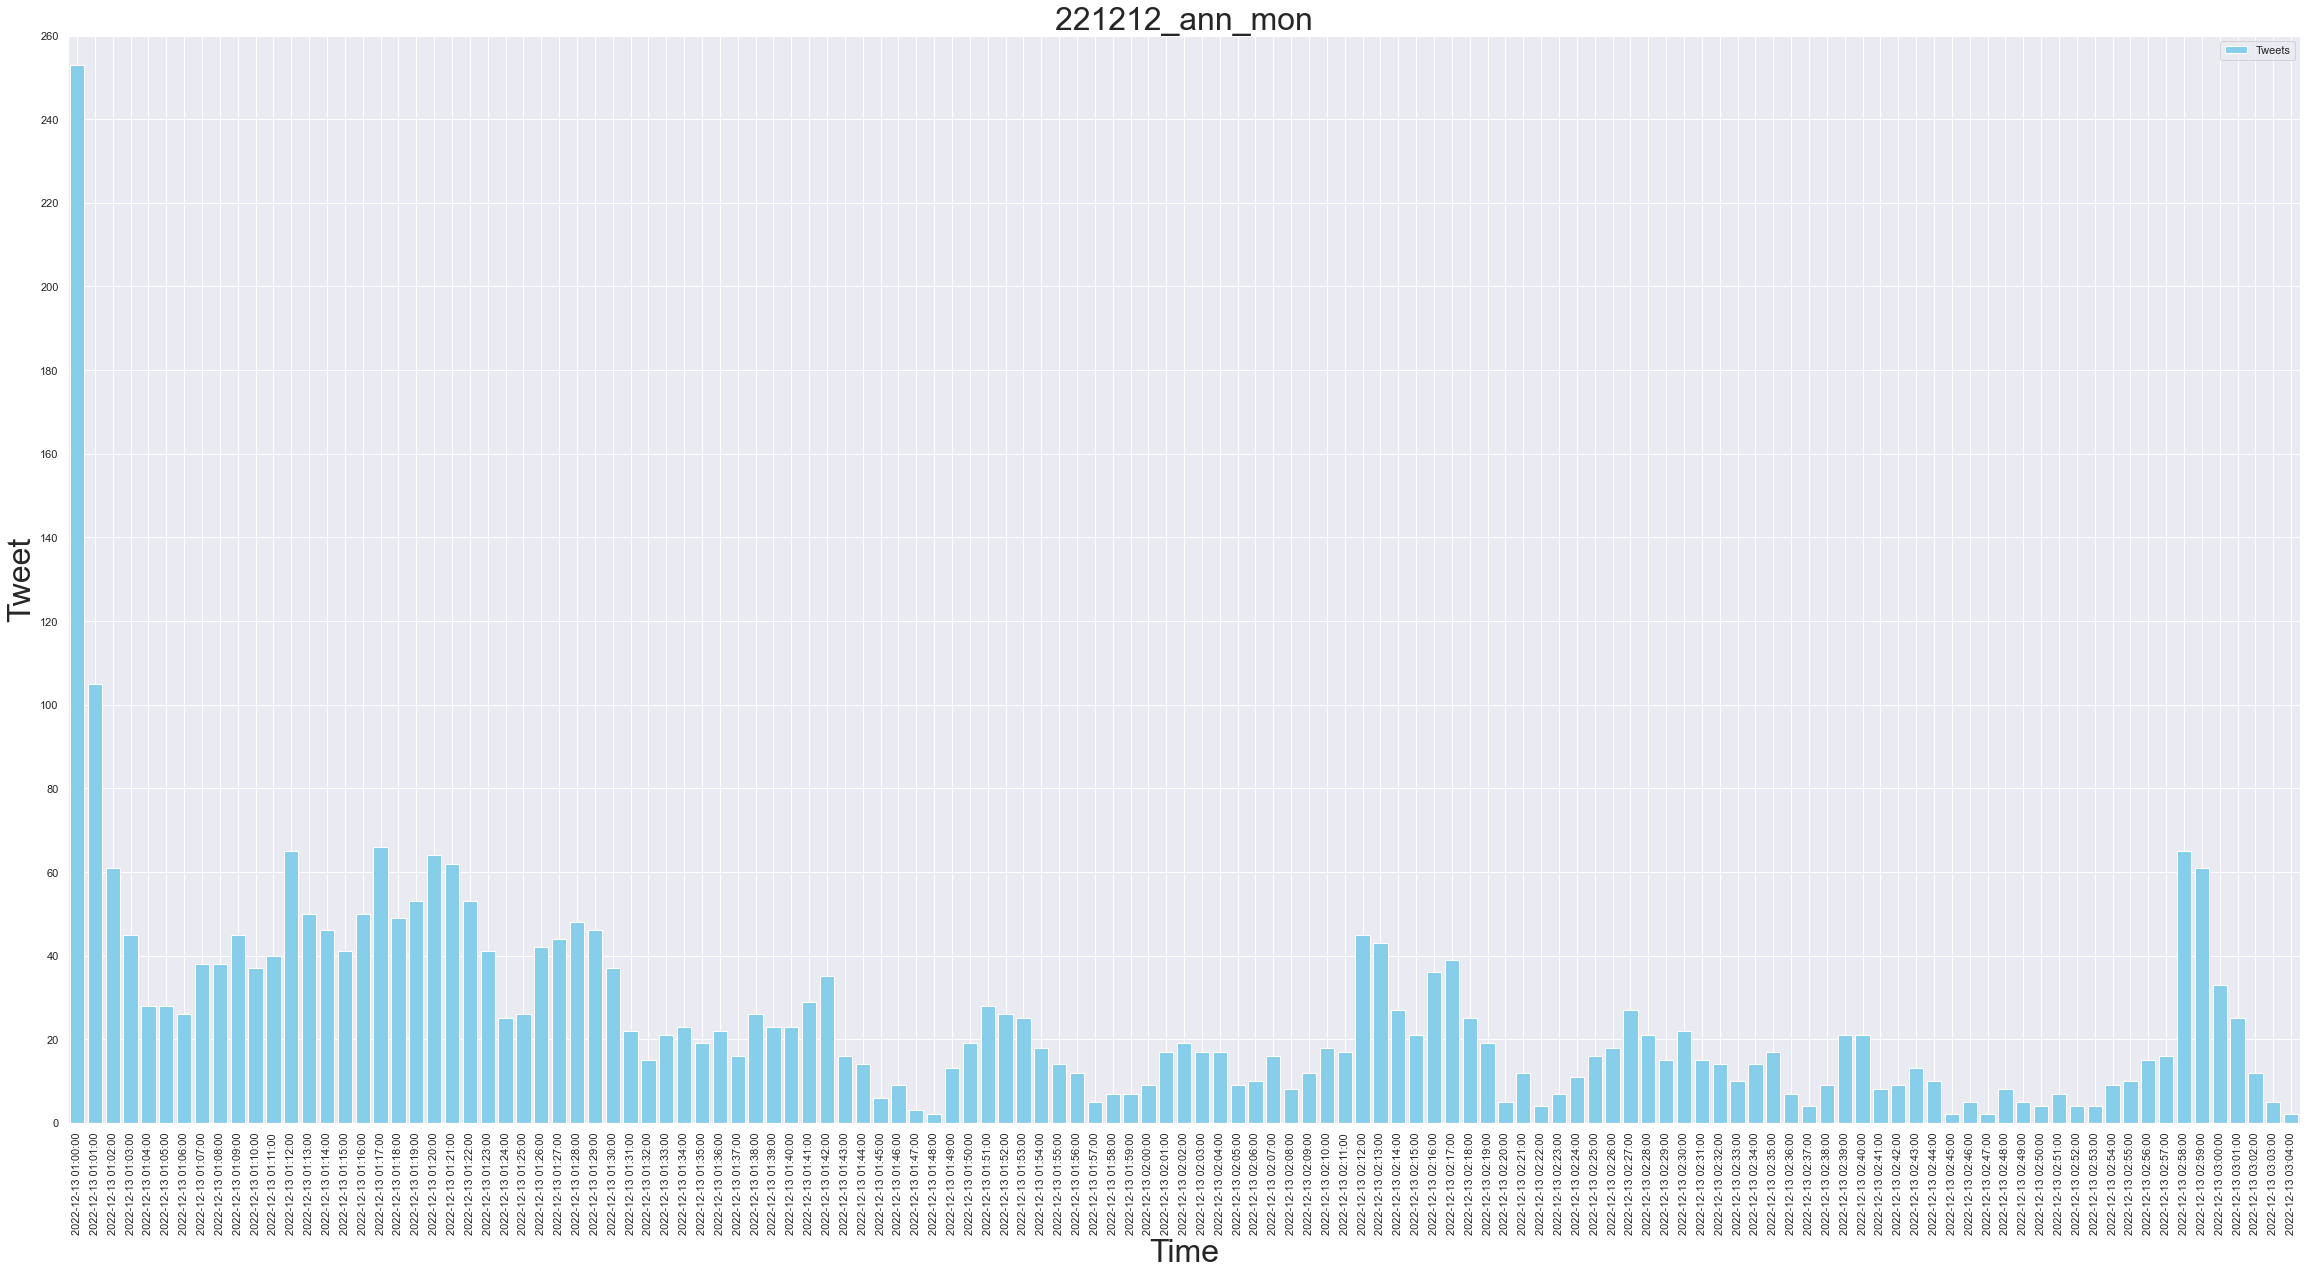

In [7]:
time = cnt['created_at']
tweets = cnt['counts']
fig = plt.figure(1, figsize=(40,20)) # 描画領域作成

c1,c2 = "skyblue", "black"
l1,l2 = "Tweets","Score"
axes = fig.add_subplot(111) # Axes作成
axes.set_xlabel("Time", fontsize = 32)
axes.set_ylabel("Tweet", fontsize = 32)
axes.bar(time, tweets, color=c1, label=l1)# 描画
axes.set_title("221212_ann_mon", fontsize = 32) # タイトル

# x軸
axes.tick_params(axis='x', rotation=90) # 軸目盛ラベルの回転
axes.set_xlim(-0.5, 124.5) # グラフの横幅と全体の端を揃える

# y軸
axes.set_ylim(0, 260) # y軸の範囲を指定する
start = 0
end = 261
stepsize = 20
axes.yaxis.set_ticks(np.arange(start, end, stepsize)) # y軸の間隔を指定する

axes.legend(loc=1)
# plt.savefig("thetrad220124.")